# Building a random forest

In [52]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
import matplotlib.pyplot as plt
import sklearn
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

In [53]:
df_diabetes = pd.read_csv('diabetes_csv.csv')

In [54]:
print(df_diabetes.shape)
df_diabetes

(768, 9)


,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive
5,5,116,74,0,0,25.6,0.201,30,tested_negative
6,3,78,50,32,88,31.0,0.248,26,tested_positive
7,10,115,0,0,0,35.3,0.134,29,tested_negative
8,2,197,70,45,543,30.5,0.158,53,tested_positive
9,8,125,96,0,0,0.0,0.232,54,tested_positive


This directory contain a data set prepared for the use of participants
for the 1994 AAAI Spring Symposium on Artificial Intelligence in Medicine.

768 cases, 8 variables (observation on patients who might have diabetes) and 2 classes (tested_positive or tested_negative)

In [55]:
### Y is the category column and X is the matrix with all other columns
X = df_diabetes.values[:, 0:7]
Y = df_diabetes.values[:,8]#.astype('category')

In [56]:
### Viewing the Classification Column mapped to values
df_diabetes.iloc[0]

preg                   6
plas                 148
pres                  72
skin                  35
insu                   0
mass                33.6
pedi               0.627
age                   50
class    tested_positive
Name: 0, dtype: object

In [57]:
### Number of unique classes (Y values)
print(np.unique(Y))
len(np.unique(Y))

['tested_negative' 'tested_positive']


2

In [58]:
X

array([[6, 148, 72, ..., 0, 33.6, 0.627],
       [1, 85, 66, ..., 0, 26.6, 0.35100000000000003],
       [8, 183, 64, ..., 0, 23.3, 0.672],
       ...,
       [5, 121, 72, ..., 112, 26.2, 0.245],
       [1, 126, 60, ..., 0, 30.1, 0.349],
       [1, 93, 70, ..., 0, 30.4, 0.315]], dtype=object)

In [59]:
i_max = 50 # length of matrix (number repeats)
j_max = 50 # width of matrix (bootstrap replicates)

In [60]:
# err_0 is the base (Single Trees)
cases = len(df_diabetes)
err_0 = np.zeros((i_max,1)) #ToDo just confirm
for i in range(i_max):
    
    for j in range(1):
        print(i, j, end="\r")
        df_to_use_sample = df_diabetes
        X = df_to_use_sample.values[:, 0:7]
        Y = df_to_use_sample.values[:, 8]#.astype('category')
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1) # 70% training and 30% test
        X_train = X_train.astype(float)
        X_test = X_test.astype(float)
        # replace missing values with rounded mean (after train/test split)
        # https://stackoverflow.com/questions/18689235/numpy-array-replace-nan-values-with-average-of-columns
        #col_means = np.nanmean(X_train, axis=0)
        #inds = np.where(np.isnan(X_train))
        #X_train[inds] = np.take(col_means, inds[1])
        ### Rounding, because all values are categorical, not numerical
        #col_means = np.round(np.nanmean(X_test, axis=0))
        #inds = np.where(np.isnan(X_test))
        #X_test[inds] = np.take(col_means, inds[1])
        
        # Create Decision Tree classifer object
        clf = DecisionTreeClassifier()
        # Train Decision Tree Classifer
        clf = clf.fit(X_train,y_train)
        #Predict the response for test dataset
        y_pred = clf.predict(X_test)
        for k in range(0,len(y_test)-1):
            if y_test[k] != y_pred[k]:
                err_0[i,j] = err_0[i,j] + 1
        err_0[i,j]= err_0[i,j]/len(y_test)

In [61]:
### Viewing the base
err_0

array([[0.41558442],
       [0.32467532],
       [0.25974026],
       [0.37662338],
       [0.32467532],
       [0.31168831],
       [0.20779221],
       [0.2987013 ],
       [0.36363636],
       [0.23376623],
       [0.32467532],
       [0.28571429],
       [0.28571429],
       [0.24675325],
       [0.2987013 ],
       [0.31168831],
       [0.28571429],
       [0.28571429],
       [0.38961039],
       [0.31168831],
       [0.25974026],
       [0.35064935],
       [0.33766234],
       [0.25974026],
       [0.4025974 ],
       [0.28571429],
       [0.24675325],
       [0.31168831],
       [0.45454545],
       [0.31168831],
       [0.2987013 ],
       [0.2987013 ],
       [0.28571429],
       [0.33766234],
       [0.2987013 ],
       [0.32467532],
       [0.35064935],
       [0.35064935],
       [0.31168831],
       [0.23376623],
       [0.32467532],
       [0.24675325],
       [0.27272727],
       [0.24675325],
       [0.23376623],
       [0.23376623],
       [0.32467532],
       [0.181

In [62]:
# Random Forest
cases = len(df_diabetes)
err = np.zeros((1,j_max))
for i in range(1):
    
    for j in range(j_max):
        print(i, j, end="\r")
        df_to_use_sample = df_diabetes.sample(n=cases, replace=True)
        X = df_to_use_sample.values[:, 0:7]
        Y = df_to_use_sample.values[:, 8]#.astype('category')
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3) # 70% training and 30% test
        X_train = X_train.astype(float)
        X_test = X_test.astype(float)
        # replace missing values with mean (after train/test split)
        # https://stackoverflow.com/questions/18689235/numpy-array-replace-nan-values-with-average-of-columns
        #col_means = np.nanmean(X_train, axis=0)
#         inds = np.where(np.isnan(X_train))
#         X_train[inds] = np.take(col_means, inds[1])
#         ### Rounding, because all values are categorical, not numerical
#         col_means = np.round(np.nanmean(X_test, axis=0))
#         inds = np.where(np.isnan(X_test))
#         X_test[inds] = np.take(col_means, inds[1])
        # Create RF classifer object
        clf = RandomForestClassifier(max_depth=None, random_state=None, n_estimators=100, max_features=1, bootstrap=False)
        # Train Decision Tree Classifer
        clf = clf.fit(X_train,y_train)
        #Predict the response for test dataset
        y_pred = clf.predict(X_test)
        for k in range(0,len(y_test)-1):
            if y_test[k] != y_pred[k]:
                err[i,j] = err[i,j] + 1
        err[i,j]= err[i,j]/len(y_test)

In [63]:
err

array([[0.15584416, 0.0995671 , 0.13852814, 0.14285714, 0.14718615,
        0.12121212, 0.12987013, 0.14718615, 0.12554113, 0.13419913,
        0.10822511, 0.14285714, 0.13852814, 0.1991342 , 0.11688312,
        0.14718615, 0.12987013, 0.11255411, 0.11255411, 0.16017316,
        0.14285714, 0.16017316, 0.14718615, 0.11255411, 0.0995671 ,
        0.12554113, 0.18181818, 0.13852814, 0.09090909, 0.12987013,
        0.12554113, 0.14285714, 0.0995671 , 0.15584416, 0.16883117,
        0.1038961 , 0.13852814, 0.14718615, 0.18181818, 0.15151515,
        0.12987013, 0.11255411, 0.12121212, 0.12554113, 0.15151515,
        0.1991342 , 0.14718615, 0.12121212, 0.13419913, 0.13852814]])

In [64]:
###AdaBoost
cases = len(df_diabetes)
errAdaBoost = np.zeros((1,j_max))
for i in range(1):
    
    for j in range(j_max):
        print(i, j, end="\r")
        df_to_use_sample = df_diabetes.sample(n=cases, replace=True)
        X = df_to_use_sample.values[:, 0:7]
        Y = df_to_use_sample.values[:, 8]#.astype('category')
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3) # 70% training and 30% test
        X_train = X_train.astype(float)
        X_test = X_test.astype(float)
        # replace missing values with mean (after train/test split)
        # https://stackoverflow.com/questions/18689235/numpy-array-replace-nan-values-with-average-of-columns
        #col_means = np.nanmean(X_train, axis=0)
#         inds = np.where(np.isnan(X_train))
#         X_train[inds] = np.take(col_means, inds[1])
#         ### Rounding, because all values are categorical, not numerical
#         col_means = np.round(np.nanmean(X_test, axis=0))
#         inds = np.where(np.isnan(X_test))
#         X_test[inds] = np.take(col_means, inds[1])
        # Create RF classifer object
        clf = AdaBoostClassifier(random_state=None, n_estimators=100)
        # Train Decision Tree Classifer
        clf = clf.fit(X_train,y_train)
        #Predict the response for test dataset
        y_pred = clf.predict(X_test)
        for k in range(0,len(y_test)-1):
            if y_test[k] != y_pred[k]:
                errAdaBoost[i,j] = errAdaBoost[i,j] + 1
        errAdaBoost[i,j]= errAdaBoost[i,j]/len(y_test)

In [65]:
### Viewing err
err

array([[0.15584416, 0.0995671 , 0.13852814, 0.14285714, 0.14718615,
        0.12121212, 0.12987013, 0.14718615, 0.12554113, 0.13419913,
        0.10822511, 0.14285714, 0.13852814, 0.1991342 , 0.11688312,
        0.14718615, 0.12987013, 0.11255411, 0.11255411, 0.16017316,
        0.14285714, 0.16017316, 0.14718615, 0.11255411, 0.0995671 ,
        0.12554113, 0.18181818, 0.13852814, 0.09090909, 0.12987013,
        0.12554113, 0.14285714, 0.0995671 , 0.15584416, 0.16883117,
        0.1038961 , 0.13852814, 0.14718615, 0.18181818, 0.15151515,
        0.12987013, 0.11255411, 0.12121212, 0.12554113, 0.15151515,
        0.1991342 , 0.14718615, 0.12121212, 0.13419913, 0.13852814]])

The paper found 32.1% for err0 (Single Tree) and 23.1% for RF, 26.6% for AdaBoost which is the improvement from bagging

0.3049350649350649


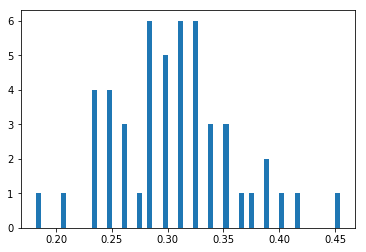

In [66]:
print(err_0.mean())
plt.hist(err_0, bins = 60)
plt.show()

0.1367099567099567


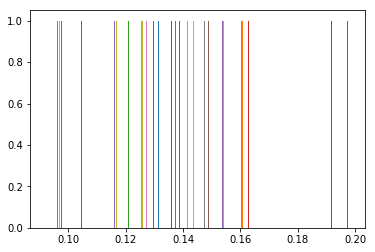

In [67]:
print(err.mean())
import matplotlib.pyplot as plt
plt.hist(err)
plt.show()

0.19004329004329004


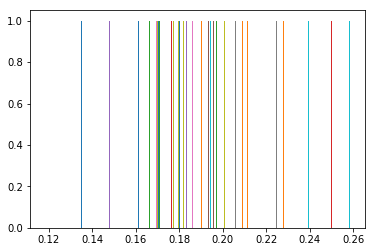

In [68]:
print(errAdaBoost.mean())
import matplotlib.pyplot as plt
plt.hist(errAdaBoost)
plt.show()

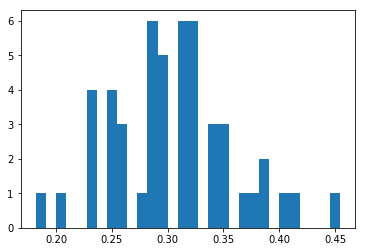

In [69]:
plt.hist(np.concatenate(err_0), bins = 30)
plt.show()

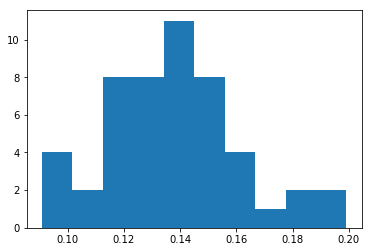

In [70]:
plt.hist(np.concatenate(err))
plt.show()

| Algorithm                   | Paper | Our results |   |
|-----------------------------|-------|-------------|---|
| Selection \(Decision Tree\) | 0\.32 | 0\.31       |   |
| AdaBoost                    | 0\.23 | 0\.13       |   |
| Random Forest               | 0\.27 | 0\.19       |   |